In [25]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
cal_housing_sk = fetch_california_housing(as_frame=True)
cal_housing = pd.DataFrame(cal_housing_sk.frame)
cal_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [26]:
from sklearn.preprocessing import StandardScaler

cal_housing_features = cal_housing.drop(columns=["MedHouseVal"])
cal_housing_label = cal_housing["MedHouseVal"]

scaler = StandardScaler()
scaler.fit(cal_housing_features)
cal_housing_features_norm = pd.DataFrame(scaler.transform(cal_housing_features),\
                                         columns=cal_housing_features.columns)
cal_housing_features_norm.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


In [27]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = cal_housing_features_norm
Y = cal_housing_label
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

regr = linear_model.LinearRegression()
%timeit -n1 -r1 regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
mult_regr_mae = mean_absolute_error(y_test, y_pred)
print("Multiple regression MAE: %.3f" % mult_regr_mae)

5.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Multiple regression MAE: 0.527


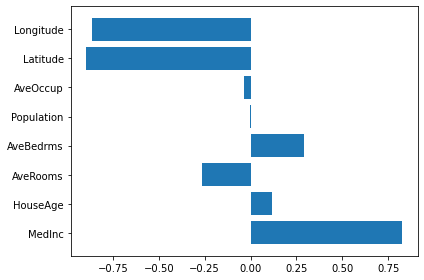

In [28]:
import matplotlib.pyplot as plt

plt.barh(cal_housing_features.columns, regr.coef_)
plt.tight_layout()
plt.savefig('images/mult_regr_feat_importances.pdf')
plt.show()